In [ ]:
#!pip install tweepy


In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid19_tweets.csv to covid19_tweets.csv


In [ ]:
import io
df1=pd.read_csv(io.BytesIO(uploaded['covid19_tweets.csv']))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
#text preprocessing part
#Sentiment analysis based on keywords extracted


In [ ]:
df1.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [ ]:
df1.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [ ]:
#using the source col for detection
#different sources used by people to tweet
df1['source'].unique()


array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Buffer', 'TweetDeck', 'Twitter for iPad', 'Africa Newsroom',
       'Blood Donors India', 'TweetCaster for Android',
       'Alexander Higgins', 'IFTTT', 'Hootsuite Inc.', 'Sprout Social',
       'Sprinklr', 'assarofficial', 'IAMBLOG2TWITTER', 'CrowdControlHQ',
       'COVID19-Updates', 'EveryoneSocial', 'Dynamic Signal', 'Instagram',
       'TweetCaster for iOS', 'GlobalPandemic.NET', 'Venrap Radio',
       'HeyOrca', 'Twitter for Advertisers', 'Paper.li',
       'Twitter Media Studio', 'Twitter for Mac', 'dlvr.it',
       'Cheap Bots, Done Quick!', 'Prof. Shanku', 'LaterMedia',
       'SEMrush Social Media Tool', 'Twitterrific for iOS',
       "Sebastian's Twitter Bot", 'Threader_client', 'COVID19FactoidBot',
       'PwC UK SMART', 'tweet pro stiff', 'UK COVID-19 Alerts',
       'Resistbot Open Letters', 'preprint-alert', 'ContentStudio.io',
       'Peeping Moon', 'TweetAutomaticos', 'Orlo', 'AgoraPulse Ma

In [ ]:
df1['source'].value_counts()

Twitter Web App            56891
Twitter for Android        40179
Twitter for iPhone         35472
TweetDeck                   8543
Hootsuite Inc.              7321
                           ...  
Login CricketCountry           1
NetNaija Twiit                 1
Blaq for BlackBerry® 10        1
InfoBlaze India                1
GlobalVillageSpace             1
Name: source, Length: 610, dtype: int64

Twitter web app is used the most followed by Android users then iPhones, also Tweetdeck


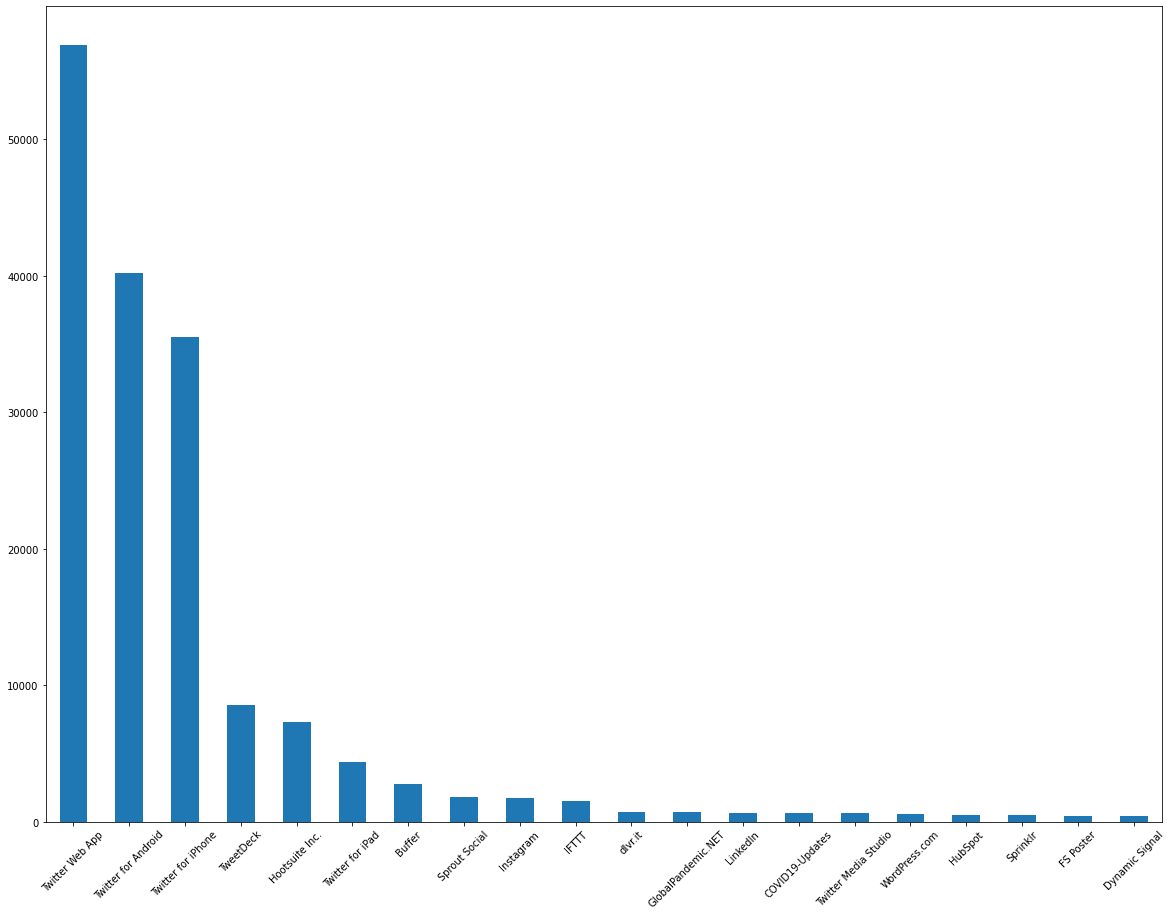

In [ ]:
plt.figure(figsize=(20,15))
df1['source'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

***text analysis on tweets***


In [ ]:
!pip install neattext

     |████████████████████████████████| 112kB 5.5MB/s 


In [ ]:
import neattext.functions as nfx
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
#check
df1['text'].iloc[3]

'@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW'

**Removal of usernames, hashtags, URL's, emojis and special characters**


In [ ]:
df1['text'].apply(nfx.extract_hashtags)

0                                      []
1                                      []
2                              [#COVID19]
3                              [#COVID19]
4         [#CoronaVirusUpdates, #COVID19]
                       ...               
179103                       [#WearAMask]
179104                         [#COVID19]
179105                                 []
179106                         [#COVID19]
179107                                 []
Name: text, Length: 179108, dtype: object

In [ ]:
df1['tags_extr']=df1['text'].apply(nfx.extract_hashtags)

In [ ]:
df1[['tags_extr','hashtags']]

,tags_extr,hashtags
0,[],NaN
1,[],NaN
2,[#COVID19],['COVID19']
3,[#COVID19],['COVID19']
4,"[#CoronaVirusUpdates, #COVID19]","['CoronaVirusUpdates', 'COVID19']"
...,...,...
179103,[#WearAMask],['WearAMask']
179104,[#COVID19],['COVID19']
179105,[],NaN
179106,[#COVID19],['COVID19']


In [ ]:
df1['clean_tweets']=df1['text'].apply(nfx.remove_hashtags)


In [ ]:
#Comparison of text before and after removal of hash tags
df1[['text','clean_tweets']]

,text,clean_tweets
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...,@brookbanktv The one gift has give me is an ...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel \n@kansa...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks @IamOhmai for nominating me for the @WH...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! The year of insanity! Lol! https://t.c...
179105,@CTVNews A powerful painting by Juan Lucena. I...,@CTVNews A powerful painting by Juan Lucena. I...
179106,"More than 1,200 students test positive for #CO...","More than 1,200 students test positive for a..."


In [ ]:
df1['clean_tweets']=df1['clean_tweets'].apply(lambda x: nfx.remove_userhandles(x))

In [ ]:
df1['clean_tweets']=df1['clean_tweets'].apply(nfx.remove_multiple_spaces)
df1['clean_tweets']=df1['clean_tweets'].apply(nfx.remove_urls)
df1['clean_tweets']=df1['clean_tweets'].apply(nfx.remove_puncts)
df1['clean_tweets']=df1['clean_tweets'].apply(nfx.remove_emojis)

### **SENTIMENT ANALYSIS:**

In [ ]:
from textblob import TextBlob

In [ ]:
def senti(text):
  blob=TextBlob(text)
  sentiment_pr= blob.sentiment.polarity
  sentiment_subj=blob.sentiment.subjectivity
  if sentiment_pr > 0:
    sentiment_label= 'positive'
  elif sentiment_pr <0:
      sentiment_label = 'negative'
  else:
    sentiment_label= 'neutral'
  
  result={'Polarity':sentiment_pr,'Subjectivity':sentiment_subj,'Sentiment':sentiment_label}
  return result


In [ ]:
chk1 = df1['clean_tweets'].iloc[0]

In [ ]:
senti(chk1)

{'Polarity': -0.25, 'Sentiment': 'negative', 'Subjectivity': 0.25}

In [ ]:
df1['sentiment_res']=df1['clean_tweets'].apply(senti)

In [ ]:
df1['sentiment_res']

0         {'Polarity': -0.25, 'Subjectivity': 0.25, 'Sen...
1         {'Polarity': 0.5, 'Subjectivity': 0.5, 'Sentim...
2         {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
3         {'Polarity': 0.0, 'Subjectivity': 0.3571428571...
4         {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
                                ...                        
179103    {'Polarity': 0.2, 'Subjectivity': 0.2, 'Sentim...
179104    {'Polarity': 0.8, 'Subjectivity': 0.7, 'Sentim...
179105    {'Polarity': 0.3, 'Subjectivity': 1.0, 'Sentim...
179106    {'Polarity': 0.26325757575757575, 'Subjectivit...
179107    {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
Name: sentiment_res, Length: 179108, dtype: object

In [ ]:
from pandas.io.json import json_normalize

In [ ]:
df1= df1.join(pd.json_normalize(df1['sentiment_res']))

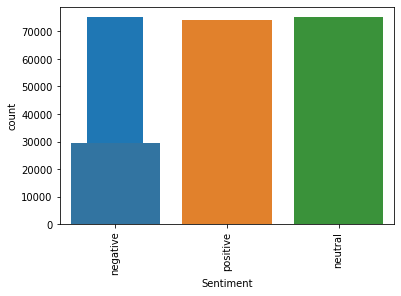

In [ ]:
df1['Sentiment'].value_counts().plot(kind='bar')
sns.countplot(df1['Sentiment'])

## **Keywords Extraction**

In [ ]:
df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,tags_extr,clean_tweets,sentiment_res,Polarity,Subjectivity,Sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,[],If I smelled the scent of hand sanitizers toda...,"{'Polarity': -0.25, 'Subjectivity': 0.25, 'Sen...",-0.25,0.250000,negative
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,[],Hey and wouldnt it have made more sense to ha...,"{'Polarity': 0.5, 'Subjectivity': 0.5, 'Sentim...",0.50,0.500000,positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,[#COVID19],Trump never once claimed was a hoax We all cl...,"{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...",0.00,0.000000,neutral
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,[#COVID19],The one gift has give me is an appreciation f...,"{'Polarity': 0.0, 'Subjectivity': 0.3571428571...",0.00,0.357143,neutral
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"[#CoronaVirusUpdates, #COVID19]",25 July : Media Bulletin on Novel,"{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...",0.00,0.000000,neutral


In [ ]:
positive_tweets = df1[df1['Sentiment']=='positive']['clean_tweets']
negative_tweets = df1[df1['Sentiment']=='negative']['clean_tweets']
neutral_tweets = df1[df1['Sentiment']=='neutral']['clean_tweets']


In [ ]:
#Removing Stop words from the tweets
positive_lst = positive_tweets.apply(nfx.remove_stopwords).tolist()
negative_lst = negative_tweets.apply(nfx.remove_stopwords).tolist()
neutral_lst = neutral_tweets.apply(nfx.remove_stopwords).tolist()

In [ ]:
#Tokenization
for line in positive_lst:
  for token in line.split():
    print (token)

Streaming output truncated to the last 5000 lines.
people
homeless
starving
and…
hypocrisy
article
astounding
BBC
suggesting
it’s
time
5
months
peddling
antiTo…
IPO
market
impacted
Q2
Explore
newly
released
IPO
Insights
Q2
2020
report
KPMG
P…
Antifacemasker
believes
fascists
+
demagogues
like
Icke
NHS
staff
care
wkers
+
fams
whove
lost
loved
on…
countries
restrict
movement
stop
face
new
realities
including
isolation
particularly…
countries
restrict
movement
stop
face
new
realities
including
isolation
particularly…
Especially
it’s
easy
feel
highly
stressed
overwhelmed
Mental
exercises
like
redirecting
t…
It’s
long
day
worth
192708
confirmed
cases
worldwide
Saturday
August
29th
2020
5:00:00
pm
+3151
cases
confirmed
hour
ago
FUN
amp
DELICIOUS…we
want
sure
doesn’t
hurt
log
run
LAB
ANALYTICS…
6955
COVID19
tests
carried
29
August
2020
278
new
cases
detected
111
expatriate
wor…
Quarantined
sweatshirts
available
different
colors
Link
bio
Hong
Kongs
Fire
Eye
Laboratory
ready
support
largescale


In [ ]:
positive_tokens= [token for line in positive_lst for token in line.split()]
negative_tokens=[token for line in negative_lst for token in line.split()]
neutral_tokens =[token for line in neutral_lst for token in line.split()]


In [ ]:
#Keywords
from collections import Counter

In [ ]:
def gtokens(docx,num=30):
  wrd_tokens= Counter(docx)
  common= wrd_tokens.most_common(num)
  res= dict(common)
  return res


In [ ]:
gtokens(negative_tokens)

{'COVID19': 751,
 'Help': 574,
 'India': 470,
 'amp': 2040,
 'bad': 475,
 'cases': 2244,
 'daily': 759,
 'day': 602,
 'dead': 510,
 'deaths': 679,
 'going': 476,
 'hard': 489,
 'health': 535,
 'identify': 533,
 'know': 528,
 'like': 756,
 'long': 549,
 'mask': 480,
 'new': 724,
 'pandemic': 896,
 'people': 1807,
 'risk': 713,
 'selfreporting': 522,
 'slow': 734,
 'sooner': 529,
 'spread': 870,
 'symptoms': 621,
 'time': 568,
 'virus': 518,
 'y…': 547}

In [ ]:
cmon_pos=gtokens(positive_tokens)
cmon_neg=gtokens(negative_tokens)
cmon_neu=gtokens(neutral_tokens)

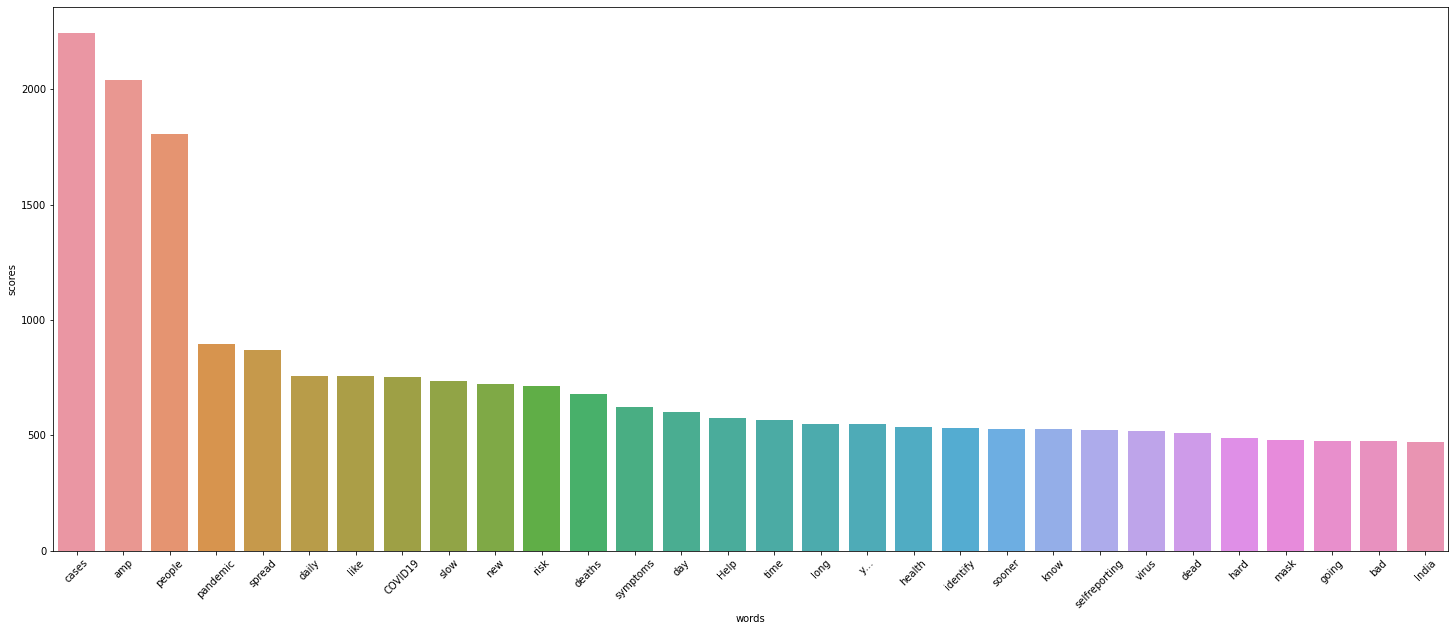

In [ ]:
neg_df = pd.DataFrame(cmon_neg.items(),columns=['words','scores'])
plt.figure(figsize=(25,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

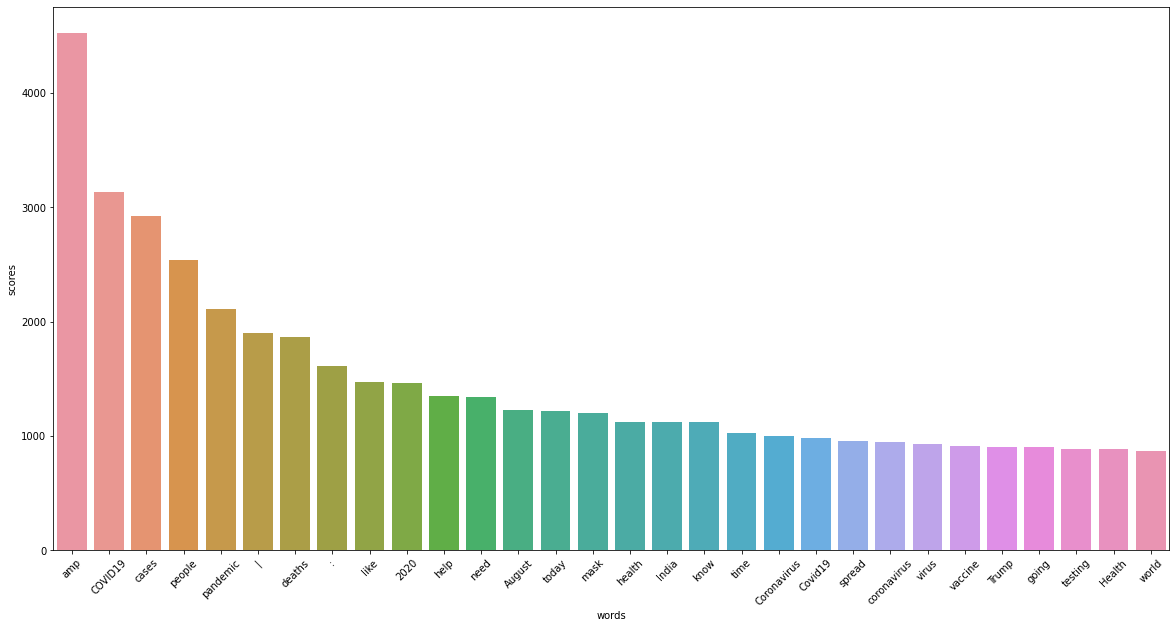

In [ ]:
neu_df = pd.DataFrame(cmon_neu.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neu_df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Word Clouds

In [ ]:
from wordcloud import WordCloud
def plot_wordcloud(docx):
  plt.figure(figsize=(15,15))
  mywordcloud=WordCloud().generate(docx)
  plt.imshow(mywordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

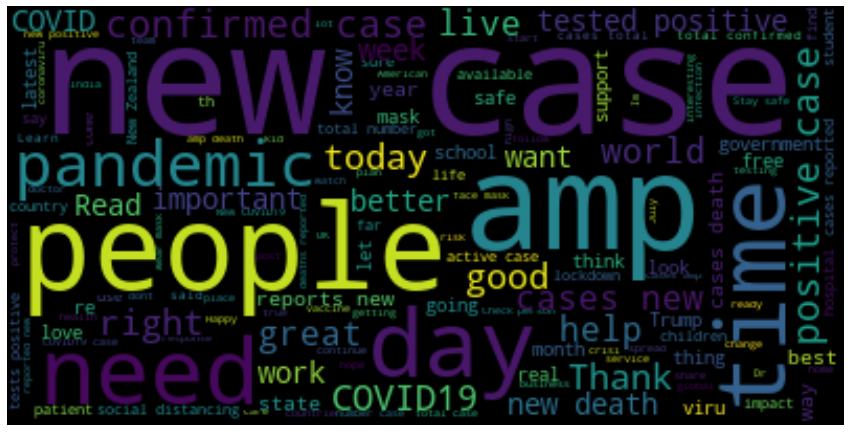

In [ ]:
pos_docs = ' '.join(positive_tokens)
plot_wordcloud(pos_docs)

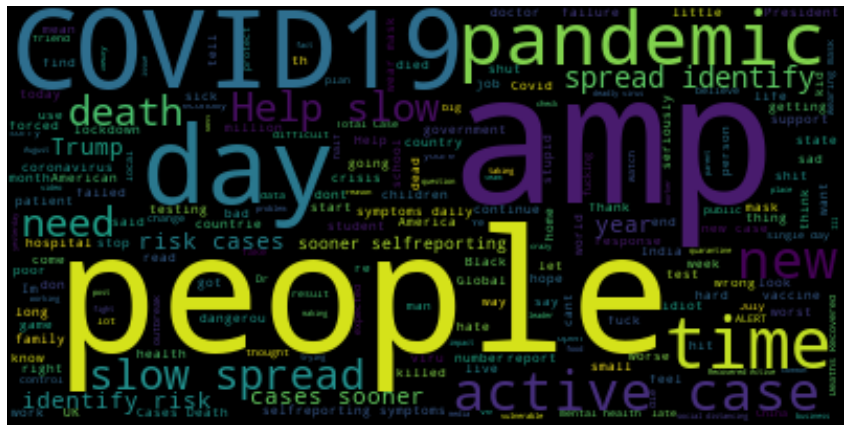

In [ ]:
neg_docs=' '.join(negative_tokens)
plot_wordcloud(neg_docs)